In [17]:
# presets for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('newData.csv')

data.describe()



,Level,Network_Strength
count,768.000000,768.000000
mean,218.229167,2.333333
std,100.486377,1.021711
min,100.000000,1.000000
25%,100.000000,1.000000
50%,200.000000,2.000000
75%,300.000000,3.000000
max,500.000000,5.000000


In [19]:
data.shape

(768, 20)

In [20]:
data.head()


,Gender,College,Churn,Level,Education_Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Other_Networks_Better_Services,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,Female,College of Engineering,No,300,Undergraduate,On-campus,Yes,Several times a week,3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6-8
1,Female,College of Engineering,No,200,Undergraduate,Off-campus,Yes,Daily,3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6-8
2,Male,College of Engineering,No,100,Undergraduate,Off-campus,Yes,Several times a week,4,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,8 and more
3,Male,College of Engineering,No,100,Undergraduate,Off-campus,Yes,Daily,1,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,8 and more
4,Male,College of Engineering,No,200,Undergraduate,Off-campus,Yes,Occasionally,1,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,8 and more


In [21]:

# Encode categorical variables
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
category_feature = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in category_feature:
    data[feature] = le.fit_transform(data[feature])
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)

# Drop unnecessary column and normalize
data = data.drop(columns=['Education_Level'])
data['Level'] = data['Level']/100
data.head()

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Other_Networks_Better_Services,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,0,2,0,3.0,1,1,4,3,1,1,0,1,1,1,1,1,1,1,3
1,0,2,0,2.0,0,1,0,3,1,1,0,1,1,1,1,1,1,1,3
2,1,2,0,1.0,0,1,4,4,1,1,0,1,1,0,1,1,1,1,4
3,1,2,0,1.0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,4
4,1,2,0,2.0,0,1,2,1,1,0,0,1,1,1,1,1,1,1,4


In [22]:
from lifelines import CoxPHFitter, KaplanMeierFitter
from sksurv.ensemble import RandomSurvivalForest

# Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='Level', event_col='Churn')
data['Cox_Predicted_Churn_Probability'] = cph.predict_partial_hazard(data)
cox_survival_prob = data['Cox_Predicted_Churn_Probability'].apply(lambda x: 1 - x).values
cph.print_summary()



<lifelines.CoxPHFitter: fitted with 768 total observations, 647 right-censored observations>
             duration col = 'Level'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 768
number of events observed = 121
   partial log-likelihood = -543.07
         time fit was run = 2024-07-13 00:52:19 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Gender                          -0.27      0.77      0.19           -0.65            0.11                0.52                1.12
College                         -0.02      0.98      0.06           -0.14            0.10                0.87                1.10
Residence                       -0.11      0.89      0.22           -0.54            0.31                0.58                1.37
SIM_Usage                        0.69      2.00      0.54           -0.37            1.76                0.69                5.81
Usage_Freq                       0.03      1.03      0.06           -0.09            0.15                0.91                1.16
Network_Strength                 0.01      1.01      0.11           -0.20            0.23                0.82                1.26
Voice_Calls                     -0.04      0.96      0.30           -0.63            0.54                0.53                1.72
Mobile_Data_Internet             0.01      1.01      0.28           -0.54            0.55                0.59                1.73
SMS_Text_Messaging               0.10      1.10      0.21           -0.31            0.50                0.74                1.65
Data_Exhaustion                  0.08      1.09      0.26           -0.42            0.59                0.66                1.80
Multiple_Networks               -0.20      0.82      0.33           -0.84            0.44                0.43                1.55
Other_Networks_Better_Services   0.43      1.53      0.30           -0.17            1.02                0.84                2.77
Poor_Network_Quality_Coverage   -0.47      0.63      0.24           -0.93            0.00                0.39                1.00
Insufficient_Data_Allowance     -2.12      0.12      0.29           -2.70           -1.55                0.07                0.21
Unsatisfactory_Customer_Service -0.74      0.48      0.25           -1.23           -0.24                0.29                0.78
High_Costs_Pricing              -1.36      0.26      0.23           -1.82           -0.91                0.16                0.40
Monthly_Data_Usage              -0.05      0.95      0.09           -0.23            0.12                0.80                1.13

                                 cmp to     z      p  -log2(p)
covariate                                                     
Gender                             0.00 -1.38   0.17      2.57
College                            0.00 -0.39   0.70      0.52
Residence                          0.00 -0.52   0.61      0.72
SIM_Usage                          0.00  1.28   0.20      2.31
Usage_Freq                         0.00  0.44   0.66      0.60
Network_Strength                   0.00  0.12   0.91      0.14
Voice_Calls                        0.00 -0.15   0.88      0.18
Mobile_Data_Internet               0.00  0.02   0.98      0.03
SMS_Text_Messaging                 0.00  0.47   0.64      0.64
Data_Exhaustion                    0.00  0.32   0.75      0.42
Multiple_Networks                  0.00 -0.62   0.54      0.90
Other_Networks_Better_Services     0.00  1.40   0.16      2.64
Poor_Network_Quality_Coverage      0.00 -1.95   0.05      4.28
Insufficient_Data_Allowance        0.00 -7.22 <0.005     40.80
Unsatisfactory_Customer_Service    0.00 -2.93 <0.005      8.20
High_Costs_Pricing                 0.00 -5.84 <0.005     27.54
Monthly_Data_Usage                 0.

In [23]:
# Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['Level'], event_observed=data['Churn'])
data['Kaplan_Meier_Predicted_Survival_Probability'] = kmf.predict(data['Level']).values




In [24]:
# Random Survival Forest model
data['Churn'] = data['Churn'].astype(bool)
X = data.drop(columns=['Level', 'Churn'])
y = data[['Churn','Level']].to_records(index=False)
rsf = RandomSurvivalForest()
rsf.fit(X, y)
data['RSF_Predicted_Churn_Probability'] = rsf.predict(X)

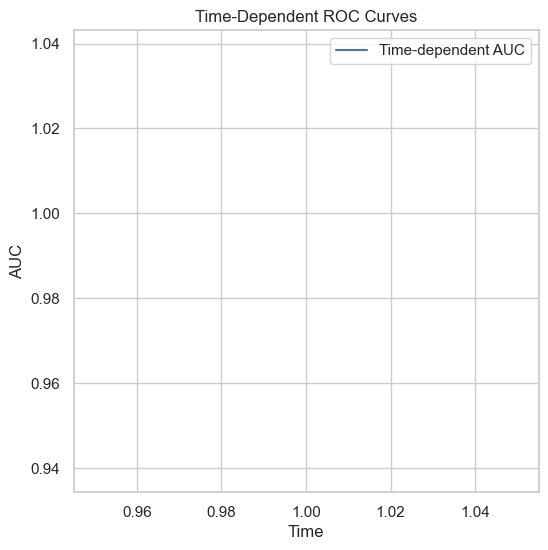

In [25]:
from sksurv.metrics import cumulative_dynamic_auc
import numpy as np
min_time = data['Level'].min()
max_time = data['Level'].max()
times = np.linspace(min_time, max_time, 1)
auc, mean_auc = cumulative_dynamic_auc(y, y, rsf.predict(X), times)

plt.figure(figsize=(6, 6))
plt.plot(times, auc, label='Time-dependent AUC')
plt.xlabel('Time')
plt.ylabel('AUC')
plt.title('Time-Dependent ROC Curves')
plt.legend()
plt.show()


In [26]:
data

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,...,Multiple_Networks,Other_Networks_Better_Services,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage,Cox_Predicted_Churn_Probability,Kaplan_Meier_Predicted_Survival_Probability,RSF_Predicted_Churn_Probability
0,0,2,False,3.0,1,1,4,3,1,1,...,1,1,1,1,1,1,3,0.774328,0.782092,0.006667
1,0,2,False,2.0,0,1,0,3,1,1,...,1,1,1,1,1,1,3,0.777610,0.900775,0.030000
2,1,2,False,1.0,0,1,4,4,1,1,...,1,0,1,1,1,1,4,0.416402,0.953125,0.042881
3,1,2,False,1.0,0,1,0,1,0,1,...,1,1,1,1,1,1,4,0.575338,0.953125,0.164778
4,1,2,False,2.0,0,1,2,1,1,0,...,1,1,1,1,1,1,4,0.576983,0.900775,0.038360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,3,False,1.0,1,1,2,3,0,0,...,1,0,1,1,1,1,1,0.594214,0.953125,0.070929
764,1,3,False,1.0,0,1,4,1,1,1,...,1,0,1,1,1,1,1,0.420940,0.953125,0.149154
765,0,3,False,1.0,0,1,0,3,0,0,...,1,0,1,1,1,1,3,0.515324,0.953125,0.032000
766,0,3,False,4.0,0,1,2,3,1,1,...,1,1,1,1,1,1,2,0.844363,0.611636,0.042167


In [32]:
data

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,...,Multiple_Networks,Other_Networks_Better_Services,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage,Cox_Predicted_Churn_Probability,Kaplan_Meier_Predicted_Survival_Probability,RSF_Predicted_Churn_Probability
0,0,2,False,3.0,1,1,4,3,1,1,...,1,1,1,1,1,1,3,0.774328,0.782092,0.006667
1,0,2,False,2.0,0,1,0,3,1,1,...,1,1,1,1,1,1,3,0.777610,0.900775,0.030000
2,1,2,False,1.0,0,1,4,4,1,1,...,1,0,1,1,1,1,4,0.416402,0.953125,0.042881
3,1,2,False,1.0,0,1,0,1,0,1,...,1,1,1,1,1,1,4,0.575338,0.953125,0.164778
4,1,2,False,2.0,0,1,2,1,1,0,...,1,1,1,1,1,1,4,0.576983,0.900775,0.038360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,3,False,1.0,1,1,2,3,0,0,...,1,0,1,1,1,1,1,0.594214,0.953125,0.070929
764,1,3,False,1.0,0,1,4,1,1,1,...,1,0,1,1,1,1,1,0.420940,0.953125,0.149154
765,0,3,False,1.0,0,1,0,3,0,0,...,1,0,1,1,1,1,3,0.515324,0.953125,0.032000
766,0,3,False,4.0,0,1,2,3,1,1,...,1,1,1,1,1,1,2,0.844363,0.611636,0.042167


In [28]:
cox_survival_prob = cph.predict_survival_function(data)
cox_survival_prob = cox_survival_prob.T 
cox_survival_prob

,1.0,2.0,3.0,4.0,5.0
0,0.989786,0.977699,0.950887,0.883107,0.883107
1,0.989743,0.977605,0.950684,0.882642,0.882642
2,0.994494,0.987945,0.973282,0.935337,0.935337
3,0.992401,0.983382,0.963273,0.911774,0.911774
4,0.992379,0.983335,0.963170,0.911533,0.911533
...,...,...,...,...,...
763,0.992153,0.982841,0.962091,0.909015,0.909015
764,0.994435,0.987814,0.972995,0.934656,0.934656
765,0.993191,0.985102,0.967040,0.920601,0.920601
766,0.988868,0.975706,0.946566,0.873234,0.873234


Cox Proportional Hazards Model Concordance Index: 0.9308733111038298
Kaplan Meier Model Concordance Index: 0.7952219416764643
Random Survival Forest Model Concordance Index: 0.9923867162654434


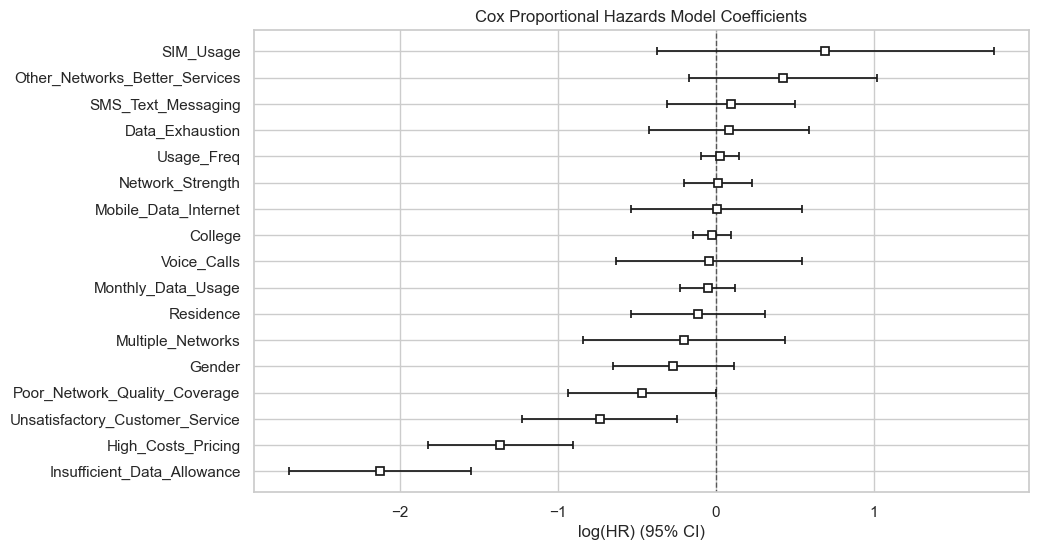

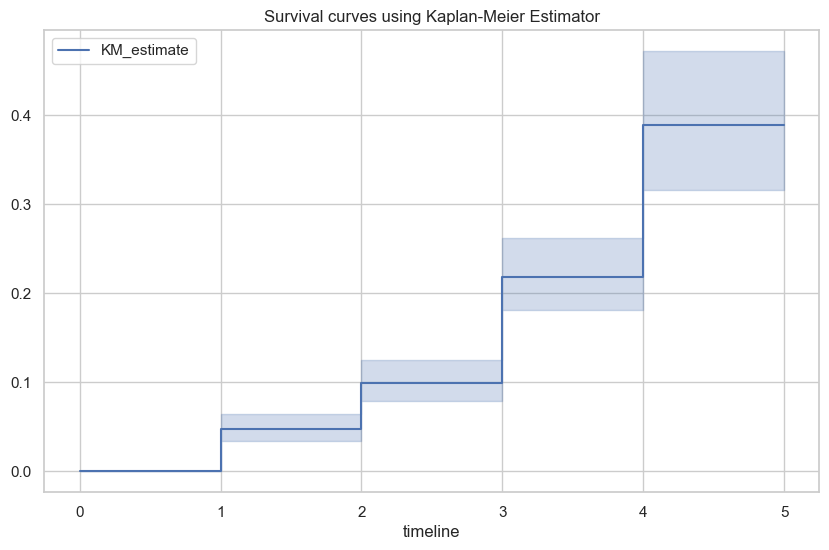

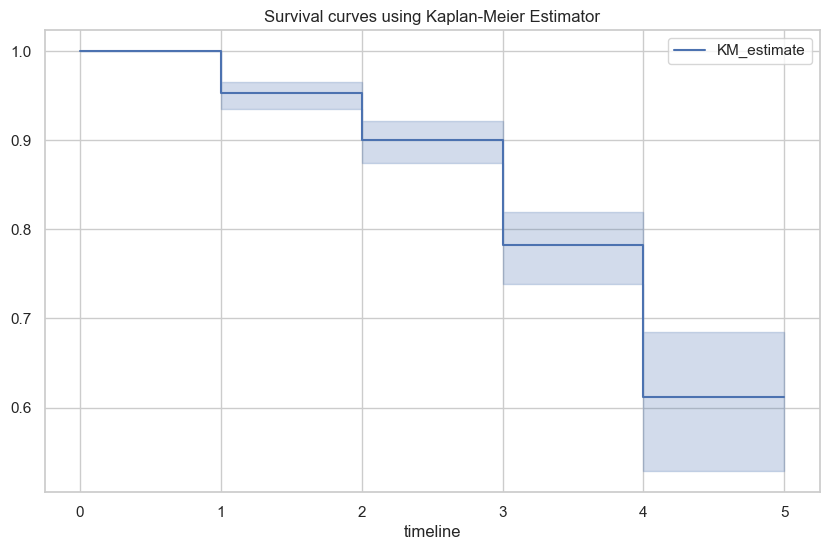

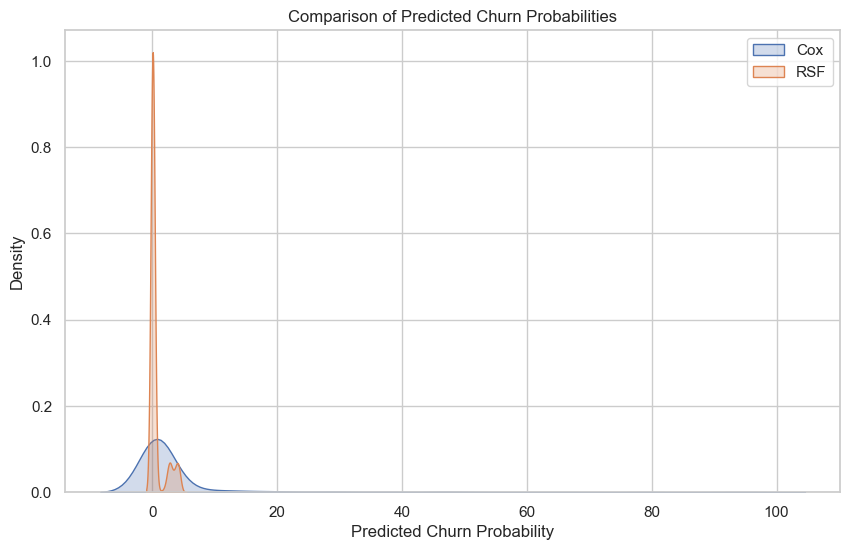

In [29]:
from lifelines.utils import concordance_index
from sksurv.metrics import concordance_index_censored
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Calculate concordance indices
cox_cindex = concordance_index(data['Level'], -data['Cox_Predicted_Churn_Probability'], data['Churn'])
km_cindex = concordance_index(data['Level'], -data['Kaplan_Meier_Predicted_Survival_Probability'], data['Churn'])
rsf_cindex = concordance_index_censored(y['Churn'], y['Level'], rsf.predict(X))[0]

print(f'Cox Proportional Hazards Model Concordance Index: {cox_cindex}')
print(f'Kaplan Meier Model Concordance Index: {km_cindex}')
print(f'Random Survival Forest Model Concordance Index: {rsf_cindex}')

# Plot and visualize model results
plt.figure(figsize=(10, 6))
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()

plt.figure(figsize=(10, 6))
kmf.plot_cumulative_density()
plt.title('Survival curves using Kaplan-Meier Estimator')
plt.show()

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Survival curves using Kaplan-Meier Estimator')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Cox_Predicted_Churn_Probability', label='Cox', fill=True)
sns.kdeplot(data=data, x='RSF_Predicted_Churn_Probability', label='RSF', fill=True)
plt.title('Comparison of Predicted Churn Probabilities')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Density')
plt.legend()
plt.show()


In [30]:
from lifelines.statistics import logrank_test

# Log-rank test for comparing survival curves
results = logrank_test(data[data['Churn'] == 0]['Level'], data[data['Churn'] == 1]['Level'], event_observed_A=data[data['Churn'] == 0]['Churn'], event_observed_B=data[data['Churn'] == 1]['Churn'])
print(results)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         628.49 <0.005    458.34


In [31]:
# pip install scikit-survival --upgrade
